<xarray.Dataset>
Dimensions:                    (x: 3397, y: 2910)
Coordinates:
  * x                          (x) float64 -2.284e+06 -2.284e+06 ... -2.182e+06
  * y                          (y) float64 1.832e+06 1.832e+06 ... 1.919e+06
Data variables: (12/15)
    albers_conical_equal_area  |S1 ...
    US_210CBD                  (y, x) float32 ...
    US_210CBH                  (y, x) float32 ...
    US_210CC                   (y, x) float32 ...
    US_210CH                   (y, x) float32 ...
    US_210EVC                  (y, x) float32 ...
    ...                         ...
    US_210FVH                  (y, x) float32 ...
    US_210FVT                  (y, x) float32 ...
    US_ASP                     (y, x) float32 ...
    US_DEM                     (y, x) float32 ...
    US_FDIST                   (y, x) float32 ...
    US_SLP                     (y, x) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.3.2, released 2021/09/01
    history:             Fri Feb  4 09:00:45 2022: ncrename -v Band14,US_SLP ...
    NCO:                 netCDF Operators version 4.9.1 (Homepage = http://nc...

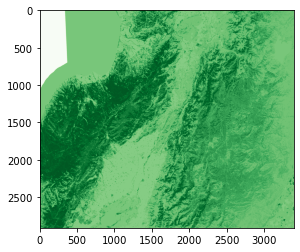

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import plotly.express as px
from itertools import product
fn = 'Downloads/farsite.nc'
ds = nc.Dataset(fn)
ft = ds['US_210F40'][:].data
ds['albers_conical_equal_area']
#pairs = list(product(ds[‘x’][:].data, ds[‘x’][:].data))
#plt.scatter([pair[0] for pair in pairs], [pair[1] for pair in pairs])
plt.imshow(ft,cmap='Greens')
ft
ds_disk = xr.open_dataset(fn)
ds_disk

In [2]:
def Calculate_Spot_Fire(xxxxxxxx):
    #Lofting
    
    Determine plume characteristics (for torching tree)

    t_f = eq_34(t_o, z, z_F)
    t_t = eq_35(t_o, t1, t2, t3)
    t1 = eq_36(z_F, v_o, w_F)
    t2 = eq_37(Dp, z_F)
    t3 = eq_38(v_o, w_F, z, Dp, a, b, z_F)

    Flight
    z_t = eq_39(z0, t, tau, v_o0)
    tau = eq_40(v_o0)
    v_o = eq_41(Dp)
    dxdt = eq_42(U_H, z, H)
    U_H = eq_43(U_20pH, H)

    
    Ignition
    Determine if ember lands inside existing fires
    Apply Ignition Frequency
    
    return xxxxxxxx

SyntaxError: invalid syntax (Temp/ipykernel_24748/2837476235.py, line 4)

In [103]:
# Equation Set 7
# Spotting

def eq_34(t_o, z, z_F):
    """
    :param t_o: time of steady burning of tree crowns (min)
    :param z: particul height (m)
    :param z_F: flame height (m)
    :return: t_f, duration of bouyant flow structure of torching tree (min)
    """
    return t_o + 1.2 + (5.963/3.)*(((4.563 + z/z_F)/(5.963))**1.5 - 1)

def eq_35(t_o, t1, t2, t3):
    """
    :param t_o: time of steady burning of tree crowns (min)
    :param t1: time for partical to travel from initial height to flame tip, from eq_36 (min)
    :param t2: time for partical to travel through transition zone from flame tip to bouyant plume, from eq_37 (min)
    :param t3: time for partical to travel inside bouyant plume, from eq_38 (min)
    :return: t_t, time required for partical to travel upward from source (min)
    """
    return t_o + t1 + t2 + t3

def eq_36(z_F, v_o, w_F):
    """
    :param z_F: flame height (m)
    :param v_o: terminal velocity of partical (m/sec)
    :param w_F: flame gas velocity (m/sec)
    :return: t1, time for partical to travel from initial height to flame tip (min)
    """
    # z_o = .4306
    # B = 40
    ln_stuff = np.log((1-v_o/w_F)/((.4306/z_F)**.5 - (v_o)/(w_F)))
    return 1 - (.4306/z_F)**.5 + (v_o/w_F)*ln_stuff

def eq_37(Dp, z_F):
    """
    :param Dp: Partical diameter (m)
    :param z_F: flame height (m)
    :return: t2, time for partical to travel through transition zone from flame tip to bouyant plume (min)
    """
    ln_stuff = np.log(1 + 1/(1-(Dp/z_F)**.5))
    return .2 + 40*((Dp/z_F)**.5)*(1 + 40*((Dp/z_F)**.5)*ln_stuff)

def eq_38(v_o, w_F, z, Dp, a, b, z_F):
    """
    :param z: particul height (m)
    :param v_o: terminal velocity of partical (m/sec)
    :param w_F: flame gas velocity (m/sec)
    :param Dp: Partical diameter (m)
    :param z_F: flame height (m)
    :param a: defines shape of eliptical fire, from eq_15 (vertical radius) (m/min)
    :param b: defines shape of eliptical fire, from eq_16 (horizontal radius) (m/min)
    :return: t3, time for partical to travel inside bouyant plume (min)
    """
    r = ((b + z/z_F)/(a))**.5
    x = v_o/w_F
    ln_stuff = np.log((1-.8*(x))/(1-.8*r*(x)))
    return 5.963/(.8*x)*(ln_stuff - .8*x*(r-1) - .5*((.8*x)**2)*(r-1)**2)
    
def eq_39(z0, t, tau, v_o0):
    """
    :param z0: initial height of partical
    :param t: current time (min)
    :param v_o0: terminal velocity, from eq_41 (m/sec)
    :param tau: from eq_40
    :return: z_t, partical height at time t (m)
    """
    
    return z0 + v_o0*(t/tau - .5*(t/tau)**2)

def eq_40(v_o0):
    """
    :param v_o0: terminal velocity, from eq_41 (m/sec)
    :return: tau
    """
    return (4*1.2*v_o0)/(.0064*3.1415*9.8)

def eq_41(Dp):
    """
    :param Dp: Partical diameter (m)
    :return: v_o (okay, so what is v_o0?)
    """
    return ((3.1415*.3*9.8*Dp)/(2*1.2*.0012))**.5

def eq_42(U_H, z, H):
    """
    :param U_H: wind speed at height H, from eq_43 (m/sec)
    :param z: height of partical (m)
    :param H: height of forest canopy (m)
    :return: dXdt, velocity in X direction of partical (m/sec)
    """
    return U_H*np.log(z/.4306)/np.log(H/.4306)

def eq_43(U_20pH, H):
    """
    :param U_20pH: windspeed at twenty feet (6.1 m) over tree height (m/sec)
    :param H: height of canopy (m)
    :return: U_H, wind speed at height H (m/sec)
    """
    return U_20pH/np.log((20+1.18*H)/(.43*H))

In [89]:
# C Canopy heght, using canopy height/2 to estimate the flame height
fn = ds['US_210CH'][:].data
print(fn.shape)

slic_C = fn[2500:2510,0:10]/10
slic_C

(2910, 3397)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., 19., 31.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19., 27.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [90]:
import random
print("Time of steady burning of tree crowns (min) can be estimate from R. we can desice each grid -> 1 tree inside to simplify the calculation")
t_o = 30 

print("Flame height is mosty related to canopy height, using canopy height/2 to estimate the flame height")
z_F = slic_C[0,7]/2
print("flame height",z_F)
print("1. Particles are assumed to originate at the top of the canopy. So, the height should be the canopy height. In the Firesie essay: ")
z = 2*z_F+6.1
print("",z)
tf = eq_34(t_o, z, z_F)
print("duration of bouyant flow structure of torching tree (min)",tf)



Time of steady burning of tree crowns (min) can be estimate from R. we can desice each grid -> 1 tree inside to simplify the calculation
Flame height is mosty related to canopy height, using canopy height/2 to estimate the flame height
flame height 9.5
1. Particles are assumed to originate at the top of the canopy. So, the height should be the canopy height. In the Firesie essay: 
 25.1
duration of bouyant flow structure of torching tree (min) 31.852351015390276


McAllister et al. [41] tested poplar samples in a 90 mm × 250 mm × 600 mm wind tunnel capable of varying airflow velocity from 0.8 m/s to 1.6 m/s. there are rare information about flame gas velocity. So, I plan to use the airflow velocity to simulate. my plan is to use wind speed* (1.6/0.8) to estimate. 

In [91]:
wind_spead = 6
w_F =wind_spead * random.uniform(-2,2)* (1.6/0.8)

Dp = (3 + random.uniform(-1,1)) * 10**-6
print("random particul diameter (m): 2-3 *10^-6",Dp)
v_o = eq_41(Dp)
print("terminal particle velocity is", v_o)
t1 = eq_36(z_F, v_o, w_F)
print("time for partical to travel from initial height to flame tip (min)",t1)

random particul diameter (m): 2-3 *10^-6 2.473808857316941e-06
terminal particle velocity is 0.08906950185784196
time for partical to travel from initial height to flame tip (min) 0.794763707798292


In [92]:
t2 = eq_37(Dp, z_F)
print(" time for partical to travel through transition zone from flame tip to bouyant plume (min)",t2)

 time for partical to travel through transition zone from flame tip to bouyant plume (min) 0.2207006980781305


In [93]:
print("a,b information is from fire_display_and_formula.ipynb in our git")
#a = eq_15(R, HB, LB)[0,7]
#b = eq_16(R, HB)[0,7]
a = 4.18298652
b = 4.28729908

a,b information is from fire_display_and_formula.ipynb in our git


In [94]:

t3 = eq_38(v_o, w_F, z, Dp, a, b, z_F)
print("time for partical to travel inside bouyant plume (min)", t3)

time for partical to travel inside bouyant plume (min) 0.006739472508618246


In [95]:
print("time required for partical to travel upward from source (min)",t_o+t1+t2+t3 )

time required for partical to travel upward from source (min) 31.02220387838504


In [96]:
print("missing U20, using the same estimation from the fire_display_and_formula.ipynb in our git")
U_20pH = 6.1
H = slic_C[0,7]
U_H = eq_43(U_20pH, H)
dxv = eq_42(U_H, z, H)
print("velocity in X direction of partical (m/sec)", dxv)
print("notice that the direction is based on wind direction")

missing U20, using the same estimation from the fire_display_and_formula.ipynb in our git
velocity in X direction of partical (m/sec) 3.975642790679897
notice that the direction is based on wind direction


In [97]:
tau = eq_40(v_o)
z0 = z

In [98]:
pro = input("spotting probability: ")
print("set : ", pro,"%")

    
   
    
    

spotting probability: 20
set :  20 %


In [ ]:
import time
from random import *
ember_L = 0
while(tf>0):
    time.sleep(1)
    tf -= 1
    x = randint(1,100)
    print(".")
    if x <= int(pro):
        ember_L +=1
        print("generate ember", ember_L)

In [106]:
t = 0
y = []
x1 = []
while(t<30):
    time.sleep(0.2)
    t+=1
    z_t =eq_39(z0, t, tau, v_o)
    y.append(z_t)
    x = dxv*t
    x1.append(x)


[3.975642790679897,
 7.951285581359794,
 11.92692837203969,
 15.902571162719587,
 19.878213953399484,
 23.85385674407938,
 27.82949953475928,
 31.805142325439174,
 35.78078511611907,
 39.75642790679897,
 43.73207069747887,
 47.70771348815876,
 51.68335627883866,
 55.65899906951856,
 59.63464186019845,
 63.61028465087835,
 67.58592744155824,
 71.56157023223814,
 75.53721302291804,
 79.51285581359794,
 83.48849860427784,
 87.46414139495774,
 91.43978418563762,
 95.41542697631752,
 99.39106976699742,
 103.36671255767732,
 107.34235534835722,
 111.31799813903712,
 115.293640929717,
 119.2692837203969]

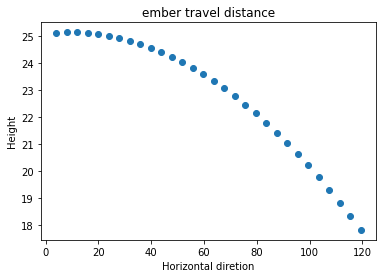

In [109]:
import matplotlib.pyplot as plt
plt.scatter(x1, y)
plt.title('ember travel distance')
plt.xlabel('Horizontal diretion')
plt.ylabel('Height')
plt.show()


To determine if embers can ignite other areas, we need to compare height and canopy height.
If height <= canopy height
ignite the area